# Examencijfers voorspellen

In dit bestand staan 12.000 examenresultaten van studenten in Colombia. Al deze studenten hebben een vragenlijst ingevuld met informatie over andere sociaal-economische aspecten zoals thuissituatie, hoeveel ze werken etc. 

Scope:  Voor dit project worden de Engels cijfers van de middelbare school (ENG_S11) voorspelt. 

Data van de universiteiten worden niet gebruikt, alleen die van de middelbare school.

In [1]:
import seaborn as sns # Het inladen van alle pakketten 
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [2]:
df = pd.read_excel('Students.xlsx') #Het inlezen van het Excel bestand

## Data Cleaning

Een eerste indruk krijgen van de dataset 

In [3]:
df.head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,...,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,...,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,...,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,...,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,...,98,100,71,189,198,98,5,4,4,2


Zo te zien is er een kolom genaamd 'Unnamed:9'. Deze kolom bevat alleen maar NAN's, daarom wordt deze verwijderd.

In [4]:
df = df.drop("Unnamed: 9",axis=1)

In [5]:
df.head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Yes,...,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,Yes,...,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,No,...,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Yes,...,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Yes,...,98,100,71,189,198,98,5,4,4,2


De naam van de school is niet nodig voor het model. Dit geldt ook voor de kolom 'COD_S11' dus deze wordt ook verwijderd. 'COD_S11' is namelijk een soort studentnummer. 

In [6]:
df = df.drop(['COD_S11', 'SCHOOL_NAME' ], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   GENDER            12411 non-null  object
 1   EDU_FATHER        12411 non-null  object
 2   EDU_MOTHER        12411 non-null  object
 3   OCC_FATHER        12411 non-null  object
 4   OCC_MOTHER        12411 non-null  object
 5   STRATUM           12411 non-null  object
 6   SISBEN            12411 non-null  object
 7   PEOPLE_HOUSE      12411 non-null  object
 8   INTERNET          12411 non-null  object
 9   TV                12411 non-null  object
 10  COMPUTER          12411 non-null  object
 11  WASHING_MCH       12411 non-null  object
 12  MIC_OVEN          12411 non-null  object
 13  CAR               12411 non-null  object
 14  DVD               12411 non-null  object
 15  FRESH             12411 non-null  object
 16  PHONE             12411 non-null  object
 17  MOBILE      

Voor dit model worden alleen de Engels cijfers van de middelbare school voorspelt. Alle data over de universiteiten is daarom niet nodig. Kolom 27 t/m 41 worden daarom verwijderd. Er zijn verder geen NAN's dus dat is goed.   

In [8]:
df = df.iloc[:, : 27 ]

Checken of de juiste kolommen zijn verwijderd

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GENDER        12411 non-null  object
 1   EDU_FATHER    12411 non-null  object
 2   EDU_MOTHER    12411 non-null  object
 3   OCC_FATHER    12411 non-null  object
 4   OCC_MOTHER    12411 non-null  object
 5   STRATUM       12411 non-null  object
 6   SISBEN        12411 non-null  object
 7   PEOPLE_HOUSE  12411 non-null  object
 8   INTERNET      12411 non-null  object
 9   TV            12411 non-null  object
 10  COMPUTER      12411 non-null  object
 11  WASHING_MCH   12411 non-null  object
 12  MIC_OVEN      12411 non-null  object
 13  CAR           12411 non-null  object
 14  DVD           12411 non-null  object
 15  FRESH         12411 non-null  object
 16  PHONE         12411 non-null  object
 17  MOBILE        12411 non-null  object
 18  REVENUE       12411 non-null  object
 19  JOB 

Nu gaan we bekijken hoeveel verschillende waardes er zijn voor de educatie van de vader 

In [10]:
df['EDU_FATHER'].value_counts()

Complete professional education          3016
Complete Secundary                       2843
Complete technique or technology         1194
Incomplete Secundary                     1091
Postgraduate education                   1085
Complete primary                          824
Incomplete primary                        735
Incomplete Professional Education         425
Not sure                                  407
0                                         391
Incomplete technical or technological     277
Ninguno                                   123
Name: EDU_FATHER, dtype: int64

Zo te zien is er een aantal keer '0' ingevuld. Dit klopt niet dus hier wordt verder naar gekeken. 

In [11]:
df[df['EDU_FATHER'] == 0].head()

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11
171,F,0,0,0,Home,Stratum 3,It is not classified by the SISBEN,Five,Yes,Yes,...,Yes,Between 1 and less than 2 LMMW,No,PUBLIC,TECHNICAL/ACADEMIC,53,57,52,51,52
172,M,0,0,0,0,Stratum 2,Level 2,Two,Yes,Yes,...,Yes,Between 1 and less than 2 LMMW,No,PUBLIC,ACADEMIC,62,59,57,58,65
181,M,0,Postgraduate education,Independent professional,0,Stratum 3,It is not classified by the SISBEN,Three,Yes,Yes,...,No,Between 3 and less than 5 LMMW,No,PUBLIC,TECHNICAL,44,49,52,47,43
195,F,0,0,0,Home,Stratum 3,It is not classified by the SISBEN,Six,No,No,...,Yes,less than 1 LMMW,0,PUBLIC,ACADEMIC,72,62,62,72,62
197,F,0,Complete primary,0,0,Stratum 2,It is not classified by the SISBEN,Four,Yes,Yes,...,Yes,Between 1 and less than 2 LMMW,0,PRIVATE,TECHNICAL/ACADEMIC,68,60,62,61,80


Er zijn studenten die onvolledige informatie geven en bij veel vragen 0 invullen. Dit wordt vooral gedaan bij de opleiding en baan van de vader en moeder. Bij de baan en salaris van de student vullen ze 0 in als ze de vragen niet willen beantwoorden. Omdat deze rijen geen goede data weergeven worden deze verwijderd

In [12]:
df = df[df['EDU_FATHER'] != 0 ]
df  = df[df['OCC_FATHER'] != 0]
df = df[df['EDU_MOTHER'] != 0 ]
df  = df[df['OCC_MOTHER'] != 0]
df = df[df['REVENUE'] != 0 ]
df  = df[df['JOB'] != 0]
df  = df[df['STRATUM'] != 0]

Checken hoeveel rijen er zijn verwijderd 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11207 entries, 0 to 12410
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GENDER        11207 non-null  object
 1   EDU_FATHER    11207 non-null  object
 2   EDU_MOTHER    11207 non-null  object
 3   OCC_FATHER    11207 non-null  object
 4   OCC_MOTHER    11207 non-null  object
 5   STRATUM       11207 non-null  object
 6   SISBEN        11207 non-null  object
 7   PEOPLE_HOUSE  11207 non-null  object
 8   INTERNET      11207 non-null  object
 9   TV            11207 non-null  object
 10  COMPUTER      11207 non-null  object
 11  WASHING_MCH   11207 non-null  object
 12  MIC_OVEN      11207 non-null  object
 13  CAR           11207 non-null  object
 14  DVD           11207 non-null  object
 15  FRESH         11207 non-null  object
 16  PHONE         11207 non-null  object
 17  MOBILE        11207 non-null  object
 18  REVENUE       11207 non-null  object
 19  JOB 

Er zijn nog 11.000 rijen over dus dat is meer dan genoeg

Nu gaan we kijken hoeveel waardes er zijn voor de kolom 'SISBEN' 

SISBEN is een type verzekering voor Colombianen die dakloos zijn of een laag inkomen hebben. 

In [14]:
df['SISBEN'].value_counts()

It is not classified by the SISBEN           6610
Level 2                                      1995
Level 1                                      1966
Level 3                                       549
Esta clasificada en otro Level del SISBEN      87
Name: SISBEN, dtype: int64

Deze kolom is nog een object, maar dit moet een integer worden. Alle strings worden er daarom uit gehaald. 

In [15]:
df['SISBEN'] = df['SISBEN'].str.replace('Level ', "")
df['SISBEN'] = df['SISBEN'].str.replace('It is not classified by the SISBEN', "0")
df['SISBEN'] = df['SISBEN'].str.replace('Esta clasificada en otro del SISBEN', "0")
df['SISBEN'] = df['SISBEN'].astype('int64')

Checken of alle strings zijn verwijderd

In [16]:
df['SISBEN'].value_counts()

0    6697
2    1995
1    1966
3     549
Name: SISBEN, dtype: int64

In [17]:
df['PEOPLE_HOUSE'].value_counts()

Four              4265
Five              2624
Three             2120
Six               1004
Two                519
Seven              351
Eight              148
Nueve               71
Ten                 46
Twelve or more      31
Once                16
One                 12
Name: PEOPLE_HOUSE, dtype: int64

Alle nummers zijn momenteel uitgeschreven. Deze kolom willen we ook als integer hebben. De uitgeschreven nummers worden met str.replace omgezet naar cijfers. 

In [18]:
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('One', "1")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Once', "1")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Two', "2")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Three', "3")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Four', "4")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Five', "5")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Six', "6")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Seven', "7")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Eight', "8")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Nueve', "9")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Ten', "10")
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].str.replace('Twelve or more', "12")

In [19]:
df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].astype('int64') #De kolom omzetten naar integers 

In [20]:
df['PEOPLE_HOUSE'].value_counts()

4     4265
5     2624
3     2120
6     1004
2      519
7      351
8      148
9       71
10      46
12      31
1       28
Name: PEOPLE_HOUSE, dtype: int64

In [21]:
df['REVENUE'].value_counts()

Between 1 and less than 2 LMMW     3608
Between 2 and less than 3 LMMW     2597
Between 3 and less than 5 LMMW     2083
less than 1 LMMW                    983
Between 5 and less than 7 LMMW      901
10 or more LMMW                     585
Between 7 and less than 10 LMMW     450
Name: REVENUE, dtype: int64

In [22]:
df['STRATUM'].value_counts()

Stratum 2    3773
Stratum 3    3698
Stratum 1    1626
Stratum 4    1337
Stratum 5     486
Stratum 6     287
Name: STRATUM, dtype: int64

In Colombia krijgen alle huizen een rating van 1 t/m 6 op basis van een sociaal economische schaal. Hoe hoger je rating hoe 'mooier' je huis is. Op dit moment is de kolom nog een object. Hiervan moet een integer worden gemaakt. 

In [23]:
df['STRATUM'] = df['STRATUM'].str.replace('Stratum ', "")
df['STRATUM'] = df['STRATUM'].astype('int64')
df['STRATUM'].dtypes

dtype('int64')

Kolom 8 t/m 17 staat gaat over de faciliteiten die de studenten wel of niet hebben, zoals internet, mobiele telefoon, wasmachine etc. Deze staan allemaal aangegeven met 'Yes' of 'No'. Voor het model wordt aangepast een cijfer. 1 betekend 'Ja' en 0 betekend 'Nee'

In [24]:
df = df.replace({'Yes': 1, 'No': 0}) #str.replace werkt niet voor een heel dataframe, daarom wordt .replace gebruikt

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11207 entries, 0 to 12410
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GENDER        11207 non-null  object
 1   EDU_FATHER    11207 non-null  object
 2   EDU_MOTHER    11207 non-null  object
 3   OCC_FATHER    11207 non-null  object
 4   OCC_MOTHER    11207 non-null  object
 5   STRATUM       11207 non-null  int64 
 6   SISBEN        11207 non-null  int64 
 7   PEOPLE_HOUSE  11207 non-null  int64 
 8   INTERNET      11207 non-null  int64 
 9   TV            11207 non-null  int64 
 10  COMPUTER      11207 non-null  int64 
 11  WASHING_MCH   11207 non-null  int64 
 12  MIC_OVEN      11207 non-null  int64 
 13  CAR           11207 non-null  int64 
 14  DVD           11207 non-null  int64 
 15  FRESH         11207 non-null  int64 
 16  PHONE         11207 non-null  int64 
 17  MOBILE        11207 non-null  int64 
 18  REVENUE       11207 non-null  object
 19  JOB 

Kolom 8 t/m 17 zijn direct omgezet naar integers, dus dat hoeft niet meer gedaan te worden 

In [26]:
df['JOB'].value_counts()

0                                   10872
Yes, less than 20 hours per week      212
Yes, 20 hours or more per week        123
Name: JOB, dtype: int64

In [27]:
df.describe()

,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,FRESH,PHONE,MOBILE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11
count,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000,11207.000000
mean,2.656019,0.678415,4.349246,0.781744,0.854734,0.850986,0.600696,0.695637,0.454983,0.748282,0.970019,0.959311,0.705452,64.274561,60.796020,60.756045,63.866601,61.392969
std,1.149807,0.931771,1.357913,0.413081,0.352385,0.356118,0.489777,0.460158,0.497992,0.434019,0.170543,0.197577,0.455860,11.866690,10.067697,10.178555,11.122288,14.121017
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,26.000000,26.000000,20.000000,26.000000
25%,2.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,56.000000,54.000000,54.000000,56.000000,50.000000
50%,3.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,64.000000,61.000000,60.000000,63.000000,58.000000
75%,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,67.000000,67.000000,71.000000,71.000000
max,6.000000,3.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [28]:
df2 = df[df['ENG_S11'] == 26 ]
df2.head()

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11
10695,F,Complete Secundary,Incomplete Secundary,Independent,Home,1,1,5,1,1,...,0,less than 1 LMMW,0,PUBLIC,ACADEMIC,43,46,56,60,26


Het geslacht staat ook nog in 'F' en 'M', dit moet ook worden aangepast naar integers

In [29]:
df['GENDER'] = df['GENDER'].replace({'F': 0, 'M': 1}) 
df = df.rename(columns={"GENDER": "GENDER_MALE"}) #om duidelijk te maken dat de 1 voor MAlE staat 

In [30]:
df.head()

,GENDER_MALE,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11
0,0,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,0,3,1,1,...,1,Between 1 and less than 2 LMMW,0,PRIVATE,ACADEMIC,71,81,61,86,82
1,0,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,0,3,1,1,...,1,10 or more LMMW,0,PRIVATE,ACADEMIC,83,75,66,100,88
2,1,Not sure,Not sure,Independent,Home,2,2,5,0,0,...,0,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,38,46,42
3,0,Not sure,Not sure,Other occupation,Independent,2,0,3,1,1,...,1,Between 2 and less than 3 LMMW,0,PRIVATE,ACADEMIC,56,55,51,64,73
4,1,Complete professional education,Complete professional education,Executive,Home,4,0,1,1,1,...,1,Between 7 and less than 10 LMMW,0,PRIVATE,ACADEMIC,80,65,76,85,92


In [31]:
df['SCHOOL_NAT'] = df['SCHOOL_NAT'].replace({'PUBLIC': 0, 'PRIVATE': 1}) 
df = df.rename(columns={"SCHOOL_NAT": "PRIVATE_SCHOOL"}) #om duidelijk te maken dat de 1 voor PRIVATE staat 

In [32]:
df.head()

,GENDER_MALE,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,MOBILE,REVENUE,JOB,PRIVATE_SCHOOL,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11
0,0,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,4,0,3,1,1,...,1,Between 1 and less than 2 LMMW,0,1,ACADEMIC,71,81,61,86,82
1,0,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,5,0,3,1,1,...,1,10 or more LMMW,0,1,ACADEMIC,83,75,66,100,88
2,1,Not sure,Not sure,Independent,Home,2,2,5,0,0,...,0,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",1,ACADEMIC,52,49,38,46,42
3,0,Not sure,Not sure,Other occupation,Independent,2,0,3,1,1,...,1,Between 2 and less than 3 LMMW,0,1,ACADEMIC,56,55,51,64,73
4,1,Complete professional education,Complete professional education,Executive,Home,4,0,1,1,1,...,1,Between 7 and less than 10 LMMW,0,1,ACADEMIC,80,65,76,85,92


## Data Visualisatie 

Ik vroeg me af of studenten die thuis geen internet hebben slechter zijn in Engels, omdat je dan geen toegang hebt tot bijvoorbeeld Engelse video's of artikelen. 

<AxesSubplot:xlabel='INTERNET', ylabel='ENG_S11'>

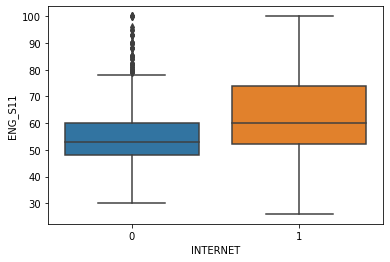

In [33]:
sns.boxplot(x='INTERNET', y= 'ENG_S11', data=df)

Studenten met internet scoren inderdaad hoger dan studenten zonder internet thuis.

Ik vroeg me ook af of studenten die naar 'private school' gaan beter zijn in Engels, omdat deze scholen vaak beter onderwijs aanbieden. 

<AxesSubplot:xlabel='PRIVATE_SCHOOL', ylabel='ENG_S11'>

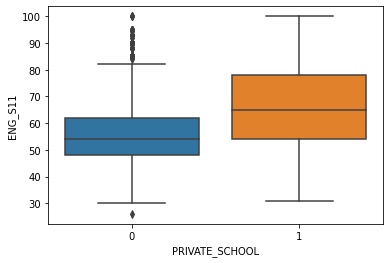

In [34]:
sns.boxplot(x='PRIVATE_SCHOOL', y= 'ENG_S11', data=df)

Studenten die naar 'private school' gaan scoren hoger op het Engels examen

Uit de vorige grafieken is te zien dat Internet en je type school invloed hebben op het Engels cijfer van de student. Nu gaan we bekijken of de financiele situatie van de ouders invloed heeft op de schoolcijfers van het kind. Dit kan met de kolom 'STRATUM'. In deze kolom worden namelijk de huizen van de ouders beoordeeld.

<AxesSubplot:xlabel='STRATUM', ylabel='ENG_S11'>

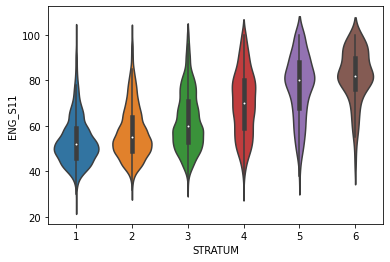

In [35]:
sns.violinplot(x='STRATUM', y= 'ENG_S11', data=df)

Je ziet hier een duidelijk verband. Studenten scoren gemiddeld steeds hoger als ze in een duurder huis wonen

Nu gaan we kijken of het salaris van de student zelf ook invloed heeft op zijn of haar scores

<AxesSubplot:xlabel='ENG_S11', ylabel='REVENUE'>

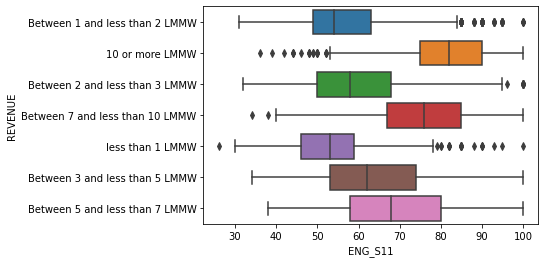

In [36]:
sns.boxplot(x='ENG_S11', y= 'REVENUE', data=df)

<AxesSubplot:xlabel='ENG_S11', ylabel='SCHOOL_TYPE'>

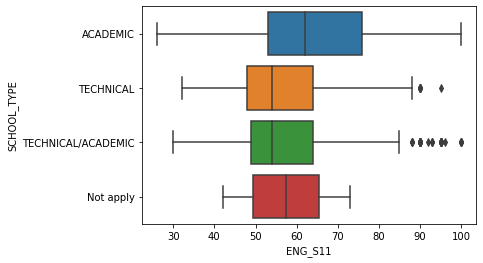

In [37]:
sns.boxplot(x='ENG_S11', y= 'SCHOOL_TYPE', data=df)

## Variabelen selecteren

Door te kijken naar de correlaties tussen 'ENG_S11' en de andere variabelen, kunnen we beslissen welke variabelen we gaan gebruiken.

In [38]:
corr = df.corr() 
corr["ENG_S11"].sort_values(ascending=False)

ENG_S11           1.000000
MAT_S11           0.594398
BIO_S11           0.592872
CR_S11            0.588899
CC_S11            0.555467
STRATUM           0.473916
PRIVATE_SCHOOL    0.380322
CAR               0.272318
MOBILE            0.259543
INTERNET          0.232647
MIC_OVEN          0.218957
WASHING_MCH       0.182879
TV                0.175995
COMPUTER          0.175703
DVD               0.135682
FRESH             0.075223
PHONE             0.042930
GENDER_MALE       0.013006
PEOPLE_HOUSE     -0.103567
SISBEN           -0.277433
Name: ENG_S11, dtype: float64

Alle variabelen met een correlatie onder de 0.25 worden niet meegenomen in het model

'Revenue' heeft een grote invloed op het cijfer van de student. Om dit te kunnen gebruiken in het model moet de data omgezet worden in dummies 

In [39]:
df_select=df.drop(columns=[ 'WASHING_MCH',
                    'TV', 'COMPUTER', 'DVD','FRESH', 'PHONE', 'GENDER_MALE', 'PEOPLE_HOUSE', 
                    'EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER', 
                    'SCHOOL_TYPE','MIC_OVEN', 'INTERNET'])
#df_select wordt gebruikt zodat de originele dataframe niet overschreven wordt en later nog gebruikt kan worden

In [40]:
df_select = pd.get_dummies(df_select)
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11207 entries, 0 to 12410
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   STRATUM                                  11207 non-null  int64
 1   SISBEN                                   11207 non-null  int64
 2   CAR                                      11207 non-null  int64
 3   MOBILE                                   11207 non-null  int64
 4   PRIVATE_SCHOOL                           11207 non-null  int64
 5   MAT_S11                                  11207 non-null  int64
 6   CR_S11                                   11207 non-null  int64
 7   CC_S11                                   11207 non-null  int64
 8   BIO_S11                                  11207 non-null  int64
 9   ENG_S11                                  11207 non-null  int64
 10  REVENUE_10 or more LMMW                  11207 non-null  uint8
 11  RE

## Het model fitten

Eerst maken we de X en Y variabelen 

In [41]:
X = df_select.loc[:, ~df_select.columns.isin(['ENG_S11'])] 
y = df_select['ENG_S11'] 

De data wordt opgesplitst in 70/30, 70% training data en 30% test data.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)
X_train.head()

,STRATUM,SISBEN,CAR,MOBILE,PRIVATE_SCHOOL,MAT_S11,CR_S11,CC_S11,BIO_S11,REVENUE_10 or more LMMW,REVENUE_Between 1 and less than 2 LMMW,REVENUE_Between 2 and less than 3 LMMW,REVENUE_Between 3 and less than 5 LMMW,REVENUE_Between 5 and less than 7 LMMW,REVENUE_Between 7 and less than 10 LMMW,REVENUE_less than 1 LMMW,JOB_0,"JOB_Yes, 20 hours or more per week","JOB_Yes, less than 20 hours per week"
8499,2,0,1,1,1,71,60,60,58,0,0,0,1,0,0,0,1,0,0
6097,2,1,1,0,0,63,54,68,62,0,1,0,0,0,0,0,1,0,0
8679,2,0,0,0,0,40,57,60,52,0,0,1,0,0,0,0,1,0,0
8251,3,0,0,1,1,48,95,77,61,0,0,0,0,1,0,0,1,0,0
11157,6,0,1,1,1,96,69,86,87,1,0,0,0,0,0,0,1,0,0


In [43]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

In [52]:
lm.intercept_

3.7468870046846376

In [53]:
pd.DataFrame(X.columns, lm.coef_) #make a DataFrame from coefficients and variable labels

,0
1.816999,STRATUM
-0.301531,SISBEN
0.518292,CAR
0.624561,MOBILE
2.829848,PRIVATE_SCHOOL
0.187937,MAT_S11
0.281899,CR_S11
0.177325,CC_S11
0.190160,BIO_S11
6.132418,REVENUE_10 or more LMMW


De formule gaat als volgt: 
ENG_S11 = 3.74 + 1.81*STRATUM -0.30*SISBEN + 0.51*CAR + 0.62*MOBILE + 2.82*PRIVATE_SCHOOL + 0.18*MAT_S11 + 0.28*CR_S11 + 0.17*CC_S11 + 0.19*BIO_S11

## Het model evalueren 

In [44]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.5695719386689424

$R^2$ is 0.57, Dit betekend dat het model 57% van de cijfers goed kan voorspellen

In [45]:
math.sqrt(mean_squared_error(y_test, y_test_p))

9.10219877999276

De RMSE is 9.1. Gemiddeld zit het model er dus 9 punten naast van de 100. 

Nu voegen we y_test, X_test en de voorspelde cijfers bij elkaar

In [46]:
df_y=pd.DataFrame(y_test)
df_y['ENG_S11_P']= lm.predict(X_test)
df_test=pd.concat([df_y,X_test[['MAT_S11']]],axis=1)

We plotten de Engels cijfers af tegen de Wiskunde cijfers, omdat deze de hoogste correlatie hebben. Dit doen we om te kijken of lineair de beste keuze is

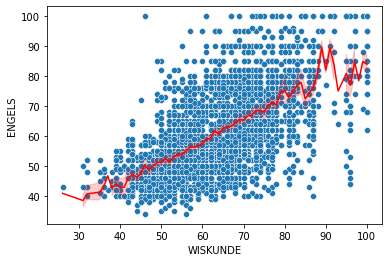

In [47]:
sns.scatterplot(x="MAT_S11", y="ENG_S11", data=df_test)
sns.lineplot(x="MAT_S11", y='ENG_S11_P', data=df_test,color='red')
plt.xlabel('WISKUNDE')
plt.ylabel('ENGELS')
plt.show()

Lineair is zo te zien inderdaad de beste optie. De cijfers gaan lineair omhoog en er zijn parabolen of curves te zien

## Poly regression

In [48]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

pl = LinearRegression()
pl.fit(X_poly, y_train)

LinearRegression()

Een nieuw dataframe aanmaken met de voorspelde prijzen 

In [49]:
df_y=pd.DataFrame(y_test)
df_y['ENG_S11_P']= pl.predict(poly.fit_transform(X_test))
df_test=pd.concat([df_y,X_test[['MAT_S11']]],axis=1)
df_test.head(10)

,ENG_S11,ENG_S11_P,MAT_S11
9774,53,80.529361,77
1476,42,47.743289,51
1895,42,48.753919,53
8781,54,67.175554,76
7708,72,49.845683,74
2524,67,68.175445,62
8230,50,61.550745,53
5988,52,61.829322,58
12387,58,53.427557,55
12333,81,66.602280,74


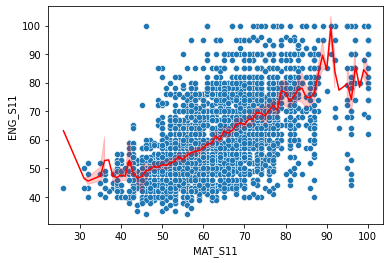

In [50]:
sns.scatterplot(x="MAT_S11", y="ENG_S11", data=df_test)
sns.lineplot(x="MAT_S11", y="ENG_S11_P", data=df_test,color='red')
plt.xlabel('MAT_S11')
plt.ylabel('ENG_S11')
plt.show()

In [51]:
y_test_p =  pl.predict(poly.fit_transform(X_test))
r2_score(y_test, y_test_p)

0.5043448197384894

In [54]:
math.sqrt(mean_squared_error(y_test, y_test_p))

9.76755469825781

# Notities 

from sklearn.preprocessing import normalize

X = df.loc[:, ~df.columns.isin(['ENGLISH PASS'])] 
y = df['ENGLISH PASS'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

rf.score(X_test, y_test) #calculate the fit on the *test* data

df['ENGLISH PASS'] = np.where(df['ENG_S11']< 60, 0, 1)
df['ENGLISH PASS'].value_counts()